# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

## 读取数据

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_titanic_train = pd.read_csv(r"D:\数据原料\titanic_train.csv")
original_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 评估和清理数据

In [3]:
cleaned_titanic_train = original_titanic_train.copy()

### 数据整齐度

In [4]:
cleaned_titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


那还说啥，整齐，必须整齐

### 数据干净度

In [5]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


`PassengerId`应为字符串类型

`Survived`,`Pclass`,`Sex`,`embarked`为分类变量，需要转化为`Category`

`Age`,`Cabin`,`Embarked`存在缺失值

In [6]:
cleaned_titanic_train['PassengerId'] = cleaned_titanic_train['PassengerId'].astype('str')

In [7]:
cleaned_titanic_train['Survived'] = cleaned_titanic_train['Survived'].astype('category')
cleaned_titanic_train['Pclass'] = cleaned_titanic_train['Pclass'].astype('category')
cleaned_titanic_train['Sex'] = cleaned_titanic_train['Sex'].astype('category')
cleaned_titanic_train['Embarked'] = cleaned_titanic_train['Embarked'].astype('category')

In [8]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


完美

#### 处理缺失数据

In [9]:
cleaned_titanic_train[cleaned_titanic_train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


有177行缺失值，但是这些缺失值的占比很大，所以不能直接删除，应该保留

但由于我们后面需要用到的逻辑回归函数`Logit`不允许数据中包含缺失值，所以用乘客年龄平均值对缺失值进行填充。

In [10]:
average_age = cleaned_titanic_train['Age'].mean()
cleaned_titanic_train['Age'] = cleaned_titanic_train['Age'].fillna(average_age)
cleaned_titanic_train['Age'].isna().sum()

np.int64(0)

In [11]:
cleaned_titanic_train[cleaned_titanic_train['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


有687条观察值的船舱号变量缺失，说明船舱号数据在大部分观察值中都是未知的，所以不能删除这些观察值。

此外，我们认为船舱号并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值。

In [12]:
cleaned_titanic_train[cleaned_titanic_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


仅有两条观察值的登船港口变量缺失，但我们认为登船港口并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值。

#### 处理重复数据

`PassengerId`不应该出现重复数据

In [13]:
cleaned_titanic_train['PassengerId'].duplicated().sum()

np.int64(0)

说明没得重复值

#### 处理不一致数据

不一致数据可能存在于所有分类变量中，我们要查看是否存在不同值实际指代同一目标的情况。

In [14]:
cleaned_titanic_train['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
cleaned_titanic_train['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [16]:
cleaned_titanic_train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [17]:
cleaned_titanic_train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

不存在不一致数据

#### 处理无效或错误数据

In [18]:
cleaned_titanic_train.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


不存在脱离现实的数据

## 整理数据

In [19]:
cleaned_titanic_train['FamilyNum'] = cleaned_titanic_train['SibSp'] + cleaned_titanic_train['Parch']
cleaned_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## 探索数据

先借助数据可视化，探索数值变量的分布，以及与乘客是否幸存存在相关性的变量，为后续的进一步分析提供方向。

In [20]:
# 调色盘颜色
sns.set_palette('pastel')

In [21]:
# 设置图标尺寸
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

### 幸存比例

([<matplotlib.patches.Wedge at 0x1bac549a660>,
 [Text(-0.39257494735793463, 1.0275626067091557, '0'),
  Text(0.3925749146953058, -1.0275626191877425, '1')],
 [Text(-0.21413178946796432, 0.5604886945686304, '61.6%'),
  Text(0.21413177165198496, -0.5604887013751322, '38.4%')])

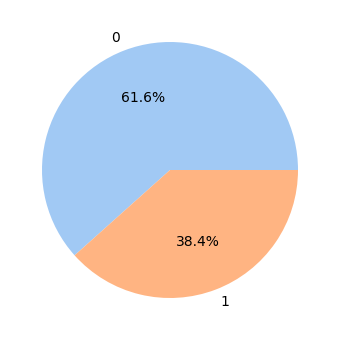

In [22]:
survived_count = cleaned_titanic_train['Survived'].value_counts()
survived_label = survived_count.index
plt.pie(survived_count,labels = survived_label,autopct = '%.1f%%')

幸存比例约为3:1，其中幸存占少数

### 乘客年龄

<Axes: ylabel='Age'>

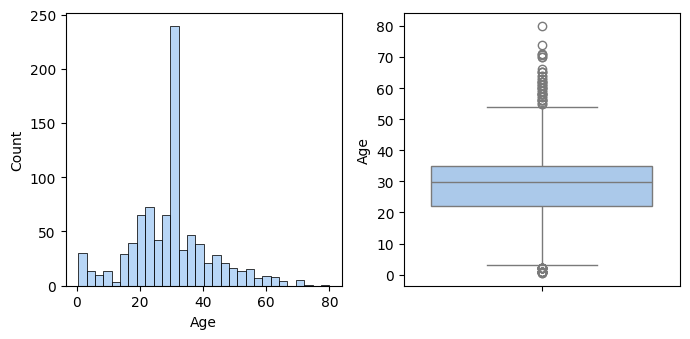

In [23]:
figure,axes = plt.subplots(1,2)
sns.histplot(cleaned_titanic_train,x = 'Age',ax = axes[0])
sns.boxplot(cleaned_titanic_train,y = 'Age',ax = axes[1])

大多数乘客位于20~40岁之间，但是也有不少的老年人和儿童

### 乘客年龄与是否幸存

<Axes: xlabel='Age', ylabel='Count'>

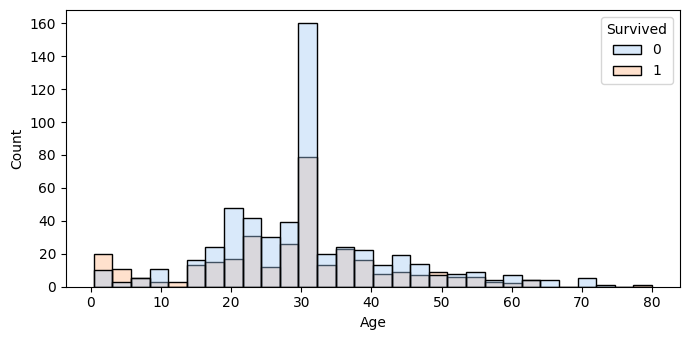

In [24]:
sns.histplot(cleaned_titanic_train,x = "Age",hue = "Survived",alpha = 0.4)

只有婴儿的幸存比例比较高

### 船票金额分布

<Axes: ylabel='Fare'>

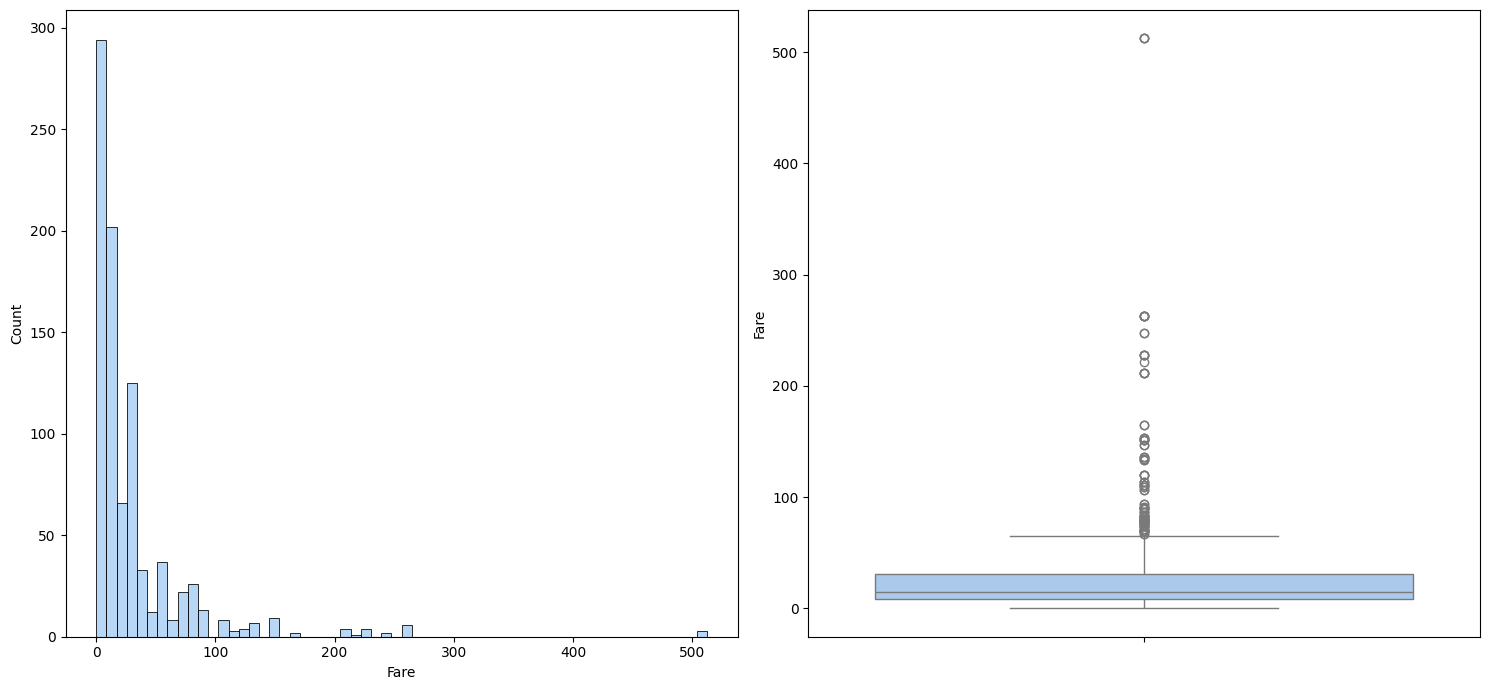

In [27]:
figure,axes = plt.subplots(1,2,figsize = [15,7])
sns.histplot(cleaned_titanic_train,x = 'Fare',ax = axes[0])
sns.boxplot(cleaned_titanic_train,y = 'Fare',ax = axes[1])

整个呈右偏态分布，说明其票价主要是中等价格，但是有极高的票价拉高了平均票价

<Axes: xlabel='Fare', ylabel='Count'>

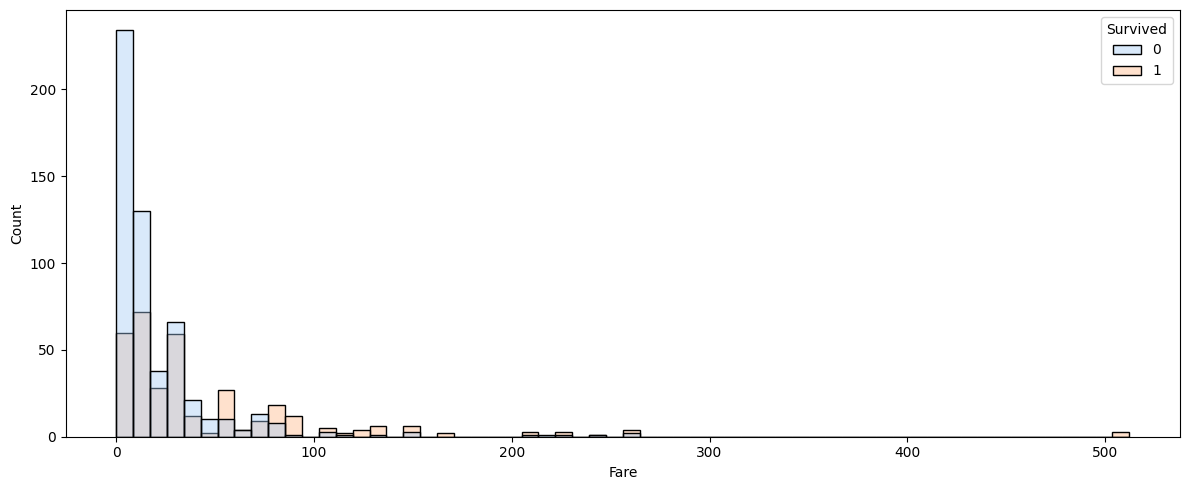

In [29]:
plt.subplots(1,1,figsize = [12,5])
sns.histplot(cleaned_titanic_train,x = 'Fare',hue = 'Survived',alpha = 0.4)

### 船舱等级与是否幸存的关系

<Axes: xlabel='Pclass', ylabel='count'>

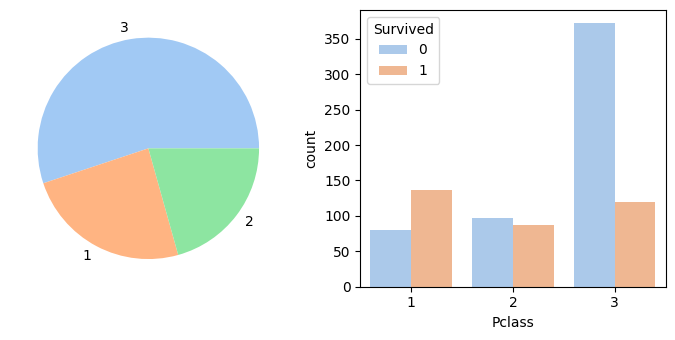

In [30]:
figure,axes = plt.subplots(1,2)
Pclass_count = cleaned_titanic_train['Pclass'].value_counts()
Pclass_label = Pclass_count.index
axes[0].pie(Pclass_count,labels = Pclass_label)
sns.countplot(cleaned_titanic_train,x = 'Pclass',hue = 'Survived',ax = axes[1])

从是否幸存与船舱等级之间的柱状图来看，船舱等级低的乘客中遇难比例更大，船舱等级高的乘客中幸存比例更大。

### 性别与是否幸存的关系

<Axes: xlabel='Survived', ylabel='count'>

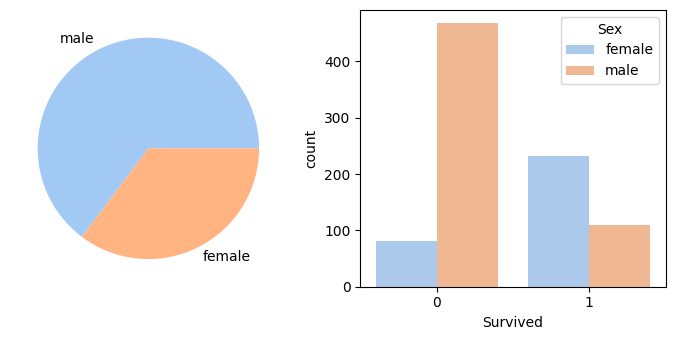

In [33]:
figure,axes = plt.subplots(1,2)
sex_count = cleaned_titanic_train['Sex'].value_counts()
sex_label = sex_count.index
axes[0].pie(sex_count,labels = sex_label)
sns.countplot(cleaned_titanic_train,x = 'Survived',hue = 'Sex',ax = axes[1])

从是否幸存与性别之间的柱状图来看，男性乘客中遇难比例更大，女性乘客中幸存比例更大。

### 登船港口与是否幸存的关系

<Axes: xlabel='Embarked', ylabel='count'>

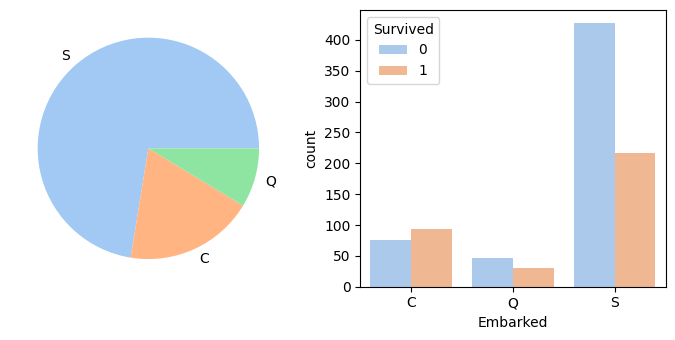

In [35]:
figure,axes = plt.subplots(1,2)
embarked_count = cleaned_titanic_train['Embarked'].value_counts()
embarked_label = embarked_count.index
axes[0].pie(embarked_count,labels = embarked_label)
sns.countplot(cleaned_titanic_train,x = 'Embarked',hue = 'Survived',ax = axes[1])

从是否幸存与登船港口之间的柱状图来看，瑟堡登船的乘客，幸存数量大于遇难数量，而皇后镇和南安普敦则相反.

### 家庭成员数量与是否幸存的关系

<Axes: xlabel='FamilyNum', ylabel='count'>

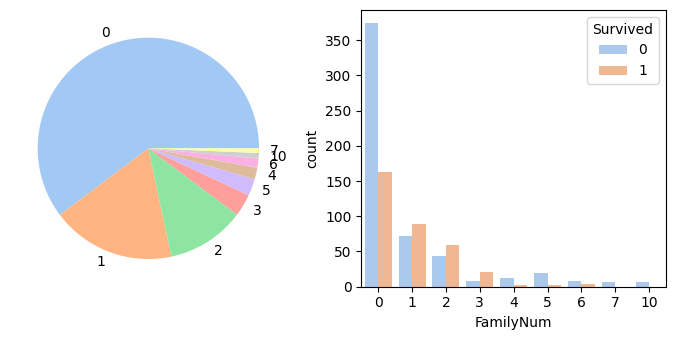

In [36]:
figure,axes = plt.subplots(1,2)
FamilyNum_count = cleaned_titanic_train['FamilyNum'].value_counts()
FamilyNum_label = FamilyNum_count.index
axes[0].pie(FamilyNum_count,labels = FamilyNum_label)
sns.countplot(cleaned_titanic_train,x = 'FamilyNum',hue = 'Survived',ax = axes[1])

从是否幸存与乘客家庭成员之间的柱状图来看，独身的乘客中遇难的多于幸存的。从有携带家庭成员的乘客来看，家庭成员在1～3位之间的幸存人数超过遇难人数，但同乘家庭成员超过3位后，遇难的更多。

## 分析数据

在分析步骤中，我们将利用以上清理后到的数据，进行逻辑回归分析，目标是得到一个可以根据泰坦尼克号乘客各个属性，对沉船事件后幸存情况进行预测的数学模型。

我们先引入做逻辑回归所需的模块。

In [37]:
import statsmodels.api as sm

In [76]:
lr_titanic_train = cleaned_titanic_train.copy()
lr_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


移除大概率不会影响幸存的变量

In [77]:
lr_titanic_train = lr_titanic_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'],axis = 1)
lr_titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilyNum
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0


数据里还存在分类变量，无法直接建立逻辑回归模型。我们需要引入虚拟变量，也就是用0和1分别表示是否属于该类别。

In [78]:
lr_titanic_train = pd.get_dummies(lr_titanic_train,drop_first = True,columns = ['Pclass','Sex'],dtype = int)
lr_titanic_train

,Survived,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
0,0,22.000000,1,0,7.2500,1,0,1,1
1,1,38.000000,1,0,71.2833,1,0,0,0
2,1,26.000000,0,0,7.9250,0,0,1,0
3,1,35.000000,1,0,53.1000,1,0,0,0
4,0,35.000000,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,1
887,1,19.000000,0,0,30.0000,0,0,0,0
888,0,29.699118,1,2,23.4500,3,0,1,0
889,1,26.000000,0,0,30.0000,0,0,0,1


分离因变量和自变量

因变量是Survived变量，因为我们进行逻辑回归的目的，是根据其它可能对乘客生还概率有影响的变量，来预测幸存情况。

In [79]:
y = lr_titanic_train['Survived']

我们可以把除`Survived`之外的先纳入自变量，但需要查看它们之间的相关性。如果其中有些变量之间相关性很高，会导致共线性。

In [80]:
X = lr_titanic_train.drop(['Survived'],axis = 1)
X.corr()

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,1.000000,-0.232625,-0.179191,0.091566,-0.248512,0.006589,-0.281004,0.084153
SibSp,-0.232625,1.000000,0.414838,0.159651,0.890712,-0.055932,0.092548,-0.114631
Parch,-0.179191,0.414838,1.000000,0.216225,0.783111,-0.000734,0.015790,-0.245489
Fare,0.091566,0.159651,0.216225,1.000000,0.217138,-0.118557,-0.413333,-0.182333
FamilyNum,-0.248512,0.890712,0.783111,0.217138,1.000000,-0.038594,0.071142,-0.200988
Pclass_2,0.006589,-0.055932,-0.000734,-0.118557,-0.038594,1.000000,-0.565210,-0.064746
Pclass_3,-0.281004,0.092548,0.015790,-0.413333,0.071142,-0.565210,1.000000,0.137143
Sex_male,0.084153,-0.114631,-0.245489,-0.182333,-0.200988,-0.064746,0.137143,1.000000


一般我们认为，当相关系数的绝对值大于0.8的时候，可能导致严重共线性，所以我们检查的时候，找绝对值大于0.8的值即可。

In [81]:
X.corr().abs() > 0.8

,Age,SibSp,Parch,Fare,FamilyNum,Pclass_2,Pclass_3,Sex_male
Age,True,False,False,False,False,False,False,False
SibSp,False,True,False,False,True,False,False,False
Parch,False,False,True,False,False,False,False,False
Fare,False,False,False,True,False,False,False,False
FamilyNum,False,True,False,False,True,False,False,False
Pclass_2,False,False,False,False,False,True,False,False
Pclass_3,False,False,False,False,False,False,True,False
Sex_male,False,False,False,False,False,False,False,True


从以上输出来看，`SibSp`和`FamilyNum`之间的相关系数绝对值大于0.8。这符合预期，因为`FamilyNum`是根据`SibSp`和`Parch`计算出来的。

不同变量之间的如果相关性过高，会导致数值优化算法无法收敛，无法获得逻辑回归模型参数的计算结果，因此我们需要移除`FamilyNum`或`SibSp`。我们对同乘家庭成员是否会影响幸存概率感兴趣，所以保留`FamilyNum`。

此外，如果仔细看相关系数数值，会发现`Parch`和`FamilyNum`之间也存在强相关，相关系数为0.78，接近0.8，因此我们也对`Parch`进行移除，避免算法无法收敛。

In [82]:
X = X.drop(['Parch','SibSp'],axis = 1)

添加截距

In [83]:
X = sm.add_constant(X)

调用`Logit`函数，利用最大似然优化来得到逻辑回归模型的参数值，并输出总结信息。

In [84]:
model = sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.443547
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      884
Method:                           MLE   Df Model:                            6
Date:                Sun, 23 Nov 2025   Pseudo R-squ.:                  0.3339
Time:                        14:26:03   Log-Likelihood:                -395.20
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.786e-82
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8097      0.445      8.568      0.000       2.938       4.681
Age           -0.0388      0.008     -4.963      0.000      -0.054      -0.023
Fare           0.0032      0.002      1.311      0.190      -0.002       0.008
FamilyNum     -0.2430      0.068     -3.594      0.000      -0.376      -0.110
Pclass_2      -1.0003      0.293     -3.416      0.001      -1.574      -0.426
Pclass_3      -2.1324      0.289     -7.373      0.000      -2.699      -1.566
Sex_male      -2.7759      0.199    -13.980      0.000      -3.165      -2.387
==============================================================================
"""

当我们把显著区间设定为0.05时，以上结果的P值可以看出，模型认为船票价格对乘客幸存概率没有显著性影响。因此可以把这个变量移除后，再次建立逻辑回归模型。

In [85]:
X = X.drop(['Fare'],axis = 1)
model = sm.Logit(y,X).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Sun, 23 Nov 2025   Pseudo R-squ.:                  0.3323
Time:                        14:26:04   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
FamilyNum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
==============================================================================
"""

逻辑回归模型预测以下因素的增加（或存在）会降低幸存概率：年龄、同乘家庭成员数、不在一等舱、性别为男性。

要理解各个各个自变量系数的实际含义，我们需要计算自然常数的次方。


In [86]:
# Age
np.exp(-0.0395)

np.float64(0.9612699539905982)

年龄每增加1岁，生还概率降低4%左右。

In [87]:
# FamilyNum
np.exp(-0.2186)

np.float64(0.803643111115195)

家庭成员每增加一名，生还概率降低20%左右

In [89]:
# Pclass_2
np.exp(-1.1798)

np.float64(0.30734020049483596)

其生还概率比一等舱低71%左右

In [90]:
# Pclass_3
np.exp(-2.3458)

np.float64(0.09577055503172162)

其生还概率比一等舱低94%左右

In [91]:
# Sex_male
np.exp(-2.7854)

np.float64(0.061704402333015156)

男性的生存概率比女性的生存概率低94%左右

根据模型参数值，我们总结：
- 年龄小的乘客幸存概率更高；
- 女性乘客的生还率比男性乘客的幸存概率更高；
- 来自的船舱等级高的乘客幸存概率更高；
- 同乘家庭成员少的乘客幸存概率更高。

前两条背后的原因可能与泰坦尼克号沉船后逃生时，“让孩子和女性先走”的原则。第三条说明可能当时舱位更尊贵的乘客拥有了优先逃生的机会。第四条可能是因为拥有较大数量家庭成员的乘客在灾难发生时会急于解救其他家庭成员而非选择逃生，最后也失去了自己逃生的机会。

我们将用于预测`titianic_test.csv`里泰坦尼克号乘客的生还情况

In [103]:
titanic_text = pd.read_csv(r"D:\数据原料\titanic_test.csv")
titanic_text.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


由于逻辑回归模型不允许数据中有缺失值，因此我们需要检查titanic_test是否存在数据缺失。

In [104]:
titanic_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


从以上输出可见，`Age`、`Fare`、`Cabin`存在缺失值。其中`Fare`和`Cabin`不属于回归模型的自变量，即使缺失也不会影响预测，因此可以忽略；`Age`需要我们进行和针对`cleaned_titanic_train`同样的操作，即用平均值填充。

In [105]:
titanic_text['Age'] = titanic_text['Age'].fillna(titanic_text['Age'].mean())
titanic_text['Age'].isna().sum()

np.int64(0)

下一步是给模型中的分类变量引入虚拟变量，但在引入前我们需要先把分类变量的类型转换为Category，并且通过`categories`参数，让程序知道所有可能的分类值。这样做的原因是，预测数据包含的分类可能不全。我们需要确保引入虚拟变量的时候，不会漏掉某个或某些分类。

In [106]:
titanic_text['Pclass'] = pd.Categorical(titanic_text['Pclass'],categories = ['1','2','3'])
titanic_text['Sex'] = pd.Categorical(titanic_text['Sex'],categories = ['male','female'])
titanic_text['Embarked'] = pd.Categorical(titanic_text['Embarked'],categories = ['C','S','Q'])

给模型用到的分类变量引入虚拟变量。

In [107]:
titanic_text = pd.get_dummies(titanic_text,drop_first = True,columns = ['Pclass','Sex'],dtype = int)
titanic_text.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_female
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,1


查看一下模型需要的输入变量。

In [108]:
model.params

const        4.061982
Age         -0.039495
FamilyNum   -0.218627
Pclass_2    -1.179763
Pclass_3    -2.345823
Sex_male    -2.785398
dtype: float64

由于我们在数据整理步骤建立了FamilyNum变量，此处也需要对预测数据加上此变量。

In [109]:
titanic_text['FamilyNum'] = titanic_text['SibSp'] + titanic_text['Parch']
titanic_text.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_female,FamilyNum
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,1,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,0,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,1,2


构建我们要输入给模型进行预测的变量，需要和模型训练时的输入一致。

In [115]:
X_text = titanic_text[['Age','FamilyNum','Pclass_2','Pclass_3','Sex_female']]
X_text = sm.add_constant(X_text)

现在就可以调用逻辑回归模型的`predict`方法，获得预测的幸存概率。

In [116]:
predicted_value = model.predict(X_text)
predicted_value

0      0.936991
1      0.310386
2      0.833867
3      0.952376
4      0.492610
         ...   
413    0.946158
414    0.434448
415    0.926995
416    0.946158
417    0.919020
Length: 418, dtype: float64

我们获得了逻辑回归模型预测的`titanic_test.csv`里，泰坦尼克号乘客的幸存概率。我们可以把概率大于等于0.5的预测为幸存，小于0.5的预测为遇难，输出一下这个最终的预测结果。

In [117]:
predicted_value > 0.5

0       True
1      False
2       True
3       True
4      False
       ...  
413     True
414    False
415     True
416     True
417     True
Length: 418, dtype: bool